# Data: https://www.kaggle.com/rahulsathyajit/shark-tank-pitches

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV

In [2]:
df = pd.read_csv('shark_tank.csv')

In [3]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [5]:
int(df.deal[0])

0

In [6]:
df.deal=(df.deal).astype(int)

In [7]:
df['Multiple Entreprenuers']=(df['Multiple Entreprenuers']).astype(int)

In [8]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


In [9]:
df.category.value_counts()

Specialty Food                                 62
Novelties                                      35
Baby and Child Care                            24
Online Services                                22
Personal Care and Cosmetics                    20
Toys and Games                                 19
Storage and Cleaning Products                  17
Outdoor Recreation                             16
Electronics                                    14
Consumer Services                              13
Entertainment                                  13
Pet Products                                   13
Kitchen Tools                                  12
Professional Services                          10
Women's Apparel                                10
Automotive                                     10
Baby and Children's Entertainment               9
Men and Women's Apparel                         9
Holiday Cheer                                   8
Women's Accessories                             8


In [10]:
for i in range(len(df)):
    df.location.iloc[i]=df.location[i].split(',')[1]

In [11]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,MN,NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,NJ,http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,NC,http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


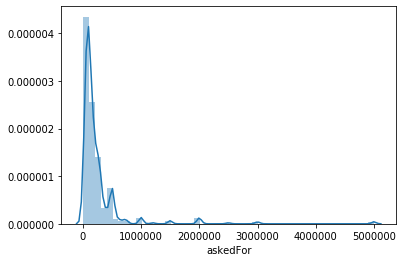

In [12]:
sns.distplot(df.askedFor)

In [13]:
def filter_outliers(dataframe,threshold):
    """
    Input a data frame and have all outliers filtered to a certain and custom threshold of standard deviations
    """
    dataframe = dataframe[(np.abs(stats.zscore(dataframe)) <= threshold).all(axis=1)]
    return dataframe

In [14]:
df.shape

(495, 19)

In [31]:
df_filter_num = filter_outliers(df.select_dtypes(include=[int,float]),2)

In [33]:
df_filter_cat = df[df.index.isin(df_filter_num.index)].select_dtypes(include='O')

In [34]:
df_filter_cat

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,title,episode-season
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,http://whybake.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1
5,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,http://www.aperfectpear.com,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2
6,A mixed martial arts clothing line looking to ...,Men and Women's Apparel,Craig French,CA,http://crookedjawfashions.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Crooked Jaw,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...
481,Ultra-thin insoles that add protection without...,Fitness Apparel and Accessories,Bryan Scott,GA,http://www.noeneusa.com,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Noene USA,6-26
482,Buck Mason makes high-quality men's clothing i...,Men and Women's Apparel,Sasha Koehn and Erik Schnakenberg,CA,https://www.buckmason.com,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Buck Mason,6-26
483,Started in 2011 by three-time world record Str...,Outdoor Recreation,Greg Myerson,CT,http://www.worldrecordstripercompany.com,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,World Record Striper Company,6-27
484,"Frameri answers the question, ""Why aren't your...",Men and Women's Accessories,Konrad Billetz and Kevin Habich,OH,https://frameri.com,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Frameri,6-27


In [39]:
df_filter=pd.concat([df_filter_cat,df_filter_num],axis=1)

In [40]:
df_filter

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,title,episode-season,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple Entreprenuers,website_length
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,http://whybake.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,1,1,460000,10,4600000,1,0,19
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,1,1,50000,15,333333,1,0,30
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0,1,250000,25,1000000,1,0,35
5,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,http://www.aperfectpear.com,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,1,2,500000,15,3333333,1,0,27
6,A mixed martial arts clothing line looking to ...,Men and Women's Apparel,Craig French,CA,http://crookedjawfashions.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Crooked Jaw,1-2,0,2,200000,20,1000000,1,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Ultra-thin insoles that add protection without...,Fitness Apparel and Accessories,Bryan Scott,GA,http://www.noeneusa.com,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Noene USA,6-26,1,26,100000,10,1000000,6,0,23
482,Buck Mason makes high-quality men's clothing i...,Men and Women's Apparel,Sasha Koehn and Erik Schnakenberg,CA,https://www.buckmason.com,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Buck Mason,6-26,0,26,200000,8,2500000,6,1,25
483,Started in 2011 by three-time world record Str...,Outdoor Recreation,Greg Myerson,CT,http://www.worldrecordstripercompany.com,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,World Record Striper Company,6-27,1,27,75000,20,375000,6,0,40
484,"Frameri answers the question, ""Why aren't your...",Men and Women's Accessories,Konrad Billetz and Kevin Habich,OH,https://frameri.com,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Frameri,6-27,0,27,150000,4,4285714,6,1,19


In [16]:
df_filter.shape

(433, 7)

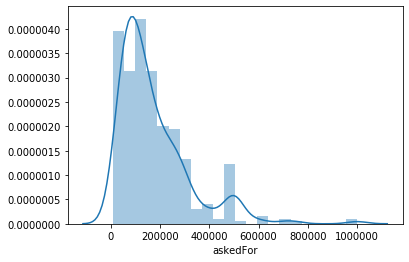

In [17]:
sns.distplot(df_filter.askedFor)

In [18]:
df_filter.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,MN,NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,NJ,http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,NC,http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


In [28]:
df_filter['website_length']=0
for i in range(len(df)):
    try:
        df_filter['website_length'][i]=len(df_filter.website[i])
    except:
        df_filter['website_length'][i]=0

In [29]:
df_filter.head()

,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple Entreprenuers,website_length
0,0,1,1000000,15,6666667,1,0,0
1,1,1,460000,10,4600000,1,0,0
2,1,1,50000,15,333333,1,0,0
3,0,1,250000,25,1000000,1,0,0
5,1,2,500000,15,3333333,1,0,0


In [ ]:
df.website.fillna('none',inplace=True)

In [ ]:
for i in range(len(df)):
    if df.website[i]=='none':
        df.website[i]=0
    else:
        df.website[i]=1

In [ ]:
df.head()